In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# load data from csv
df = pd.read_csv('nbaPlayersAllTimesAgilityData.csv')

# print df dimensions
print("df dimensions: ", df.shape)

#  remove ' ' from column names /!\ invisible characters
df.columns = df.columns.str.replace(' ', ' ')

#TODO NOT YET WORKING
# remove duplicates where the player name is the same et save recent data + if Nan check if the data exist in a dup

# print how many player name duplicates there is
print("there is", df['PLAYER'].duplicated().sum(), "duplicates")
df = df.sort_values(by=['PLAYER'], ascending=True)
df = df.drop_duplicates(subset=['PLAYER'], keep='first')
print("there is", df['PLAYER'].duplicated().sum(), "duplicates")

df dimensions:  (1608, 8)
there is 159 duplicates
there is 0 duplicates


In [103]:
# remove nan value and - with 0
df = df.replace('-', 0)
df = df.replace('nan', 0)
#convert Max Vertical Leap (inches) to int
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
# convert inch to meters and round to decimal
df['Max Vertical Leap (meters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)

#make a data frame with sum of player with Max Vertical Leap (inches) is the same -+ 5
df2 = df.groupby('Max Vertical Leap (meters)').agg({'PLAYER': 'count'})
df2 = df2.rename(columns={'PLAYER': 'count'})
df2 = df2.reset_index()
df2 = df2.sort_values(by=['count'], ascending=False)
# remove where = 0
df2 = df2[df2['Max Vertical Leap (meters)'] != 0]


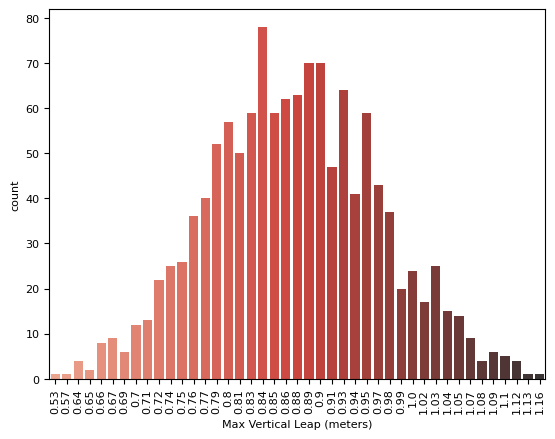

In [104]:
sns.barplot(x='Max Vertical Leap (meters)', y='count', data=df2, palette="Reds_d")
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})
plt.show()

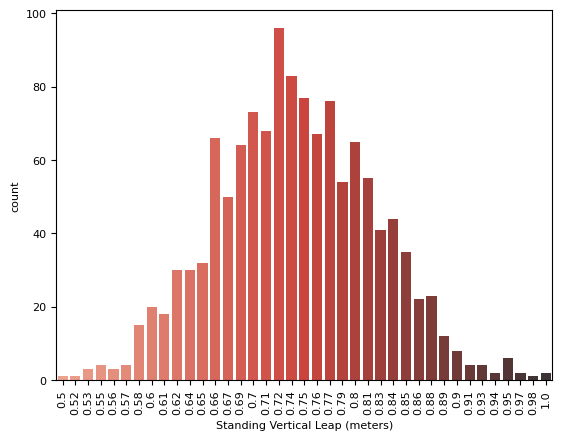

In [105]:
#  same for Standing Vertical Leap (inches)
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].apply(pd.to_numeric)
df['Standing Vertical Leap (meters)'] = round(df['Standing Vertical Leap (inches)'] * 0.0254, 2)
df3 = df.groupby('Standing Vertical Leap (meters)').agg({'PLAYER': 'count'})
df3 = df3.rename(columns={'PLAYER': 'count'})
df3 = df3.reset_index()
df3 = df3.sort_values(by=['count'], ascending=False)
df3 = df3[df3['Standing Vertical Leap (meters)'] != 0]
sns.barplot(x='Standing Vertical Leap (meters)', y='count', data=df3, palette="Reds_d")
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 8})
plt.show()

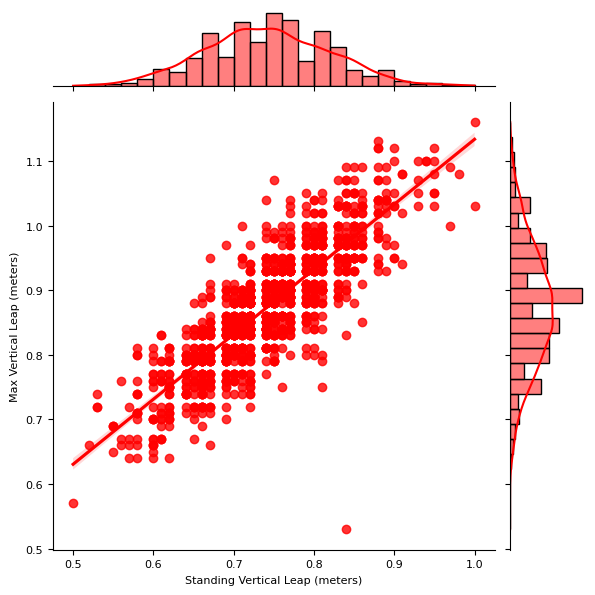

In [106]:
# checks correlations beetwen Standing Vertical Leap (inches) and Max Vertical Leap (inches)
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].apply(pd.to_numeric)
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
df['Standing Vertical Leap (meters)'] = round(df['Standing Vertical Leap (inches)'] * 0.0254, 2)
df['Max Vertical Leap (meters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)
df = df[df['Standing Vertical Leap (meters)'] != 0]
df = df[df['Max Vertical Leap (meters)'] != 0]
df = df[df['Standing Vertical Leap (meters)'] < 3]
df = df[df['Max Vertical Leap (meters)'] < 3]
sns.jointplot(x='Standing Vertical Leap (meters)', y='Max Vertical Leap (meters)', data=df, kind='reg', color='r')
plt.show()

In [107]:
# print df3 dim
print(df3.shape)

(39, 2)


   Max Jump Height (meters)  Max Vertical Leap (meters)  Height      Weight
1                      2.77                        0.81    1.96   83.914520
2                      2.95                        0.94    2.01  108.862080
3                      2.71                        0.75    1.96   94.800728
4                      2.95                        0.84    2.11  120.201880
5                      2.81                        0.80    2.01  111.130040


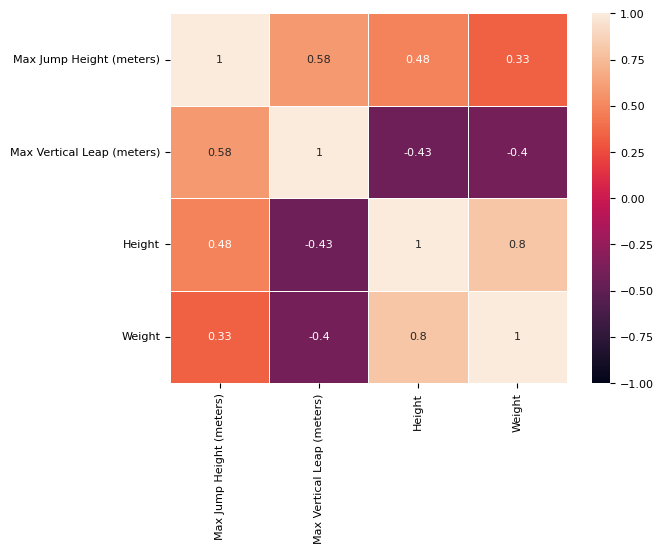

In [112]:
#  load nbaPlayersAllTimesAgilityData.csv and nbaPlayersAllTimesInfoData
dfAg = pd.read_csv('nbaPlayersAllTimesAgilityData.csv')
dfIn = pd.read_csv('nbaPlayersAllTimesInfo.csv')

#  remove ' ' from column names /!\ invisible characters
dfAg.columns = dfAg.columns.str.replace(' ', ' ')
dfIn.columns = dfIn.columns.str.replace(' ', ' ')

# remane colum Player to PLAYER
dfIn = dfIn.rename(columns={'Player': 'PLAYER'})

# remove space in player
dfAg['PLAYER'] = dfAg['PLAYER'].str.replace(' ', '')
dfIn['PLAYER'] = dfIn['PLAYER'].str.replace(' ', '')

# create array with player, height, weight from dfIn and Max Vertical Leap (inches) from dfAg
dfAg = dfAg[['PLAYER', 'Max Vertical Leap (inches)']]
dfIn = dfIn[['PLAYER', 'Height', 'Weight']]
# merge dfIn and dfAg where PLAYER exist in both
df = pd.merge(dfIn, dfAg, on='PLAYER')

# remove line where where a value is 0
df = df[df['Max Vertical Leap (inches)'] != '-']
df = df[df['Max Vertical Leap (inches)'] != 0]
df = df[df['Height'] != '-']
df = df[df['Height'] != 0]
df = df[df['Weight'] != '-']
df = df[df['Weight'] != 0]



# convert inch to meters and round to decimal
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
df['Max Vertical Leap (meters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)

# convert height to meters and round to decimal
df['Height'] = df['Height'].apply(pd.to_numeric)
df['Height'] = round(df['Height'] / 100, 2)

# add max jump height in meters
df['Max Jump Height (meters)'] = round(df['Max Vertical Leap (meters)'] + df['Height'], 2)

# print correlation
df1 = df[['Max Jump Height (meters)', 'Max Vertical Leap (meters)', 'Height', 'Weight']]
print(df1.head())
df1 = df1.corr()

# plot correlation
sns.heatmap(df1, annot=True, vmin=-1, vmax=1,linewidths=.5)
plt.show()


# interessant on voit que le poids a un petit impact positif sur la hauteur de saut (max jump height) 

# On le poids a un faible impact négatif sur la hauteur de saut (max vertical leap)
# mais un faible impact positif sur la hauteur de saut (max jump height)

# or la taille a un impact positif sur la hauteur de saut (max jump leap)
#et le poid est fortement corrélé a la taille

#donc le joueur grand on un desavantage sur le saut (sol -> pied) mais qui est compensé par un avantage sur le saut (sol -> tete) 

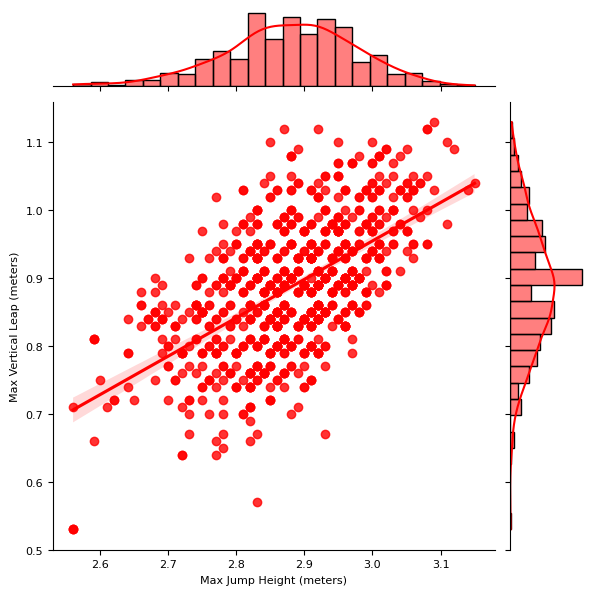

SyntaxError: keyword argument repeated: x (1376065559.py, line 14)

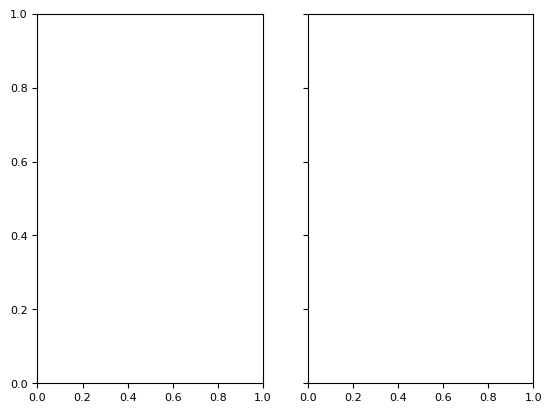

In [120]:
# find the player heights for the top 10 max jump height
df2 = df.sort_values(by=['Max Vertical Leap (meters)'], ascending=False)
df2 = df2.head(10)
df2 = df2[['PLAYER', 'Max Jump Height (meters)','Max Vertical Leap (meters)', 'Height', 'Weight']]
# print(df2)

sns.jointplot(x='Max Jump Height (meters)', y='Max Vertical Leap (meters)', data=df, kind='reg', color='r')
plt.show()


# on voit que les joueurs qui sautent le plus haut(sol tete) ne sont pas ceux qui sautent le plus haut (sol pieds) meme s'il y correlation
# print both plot  on same row next to each other
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.jointplot(x='Height', y='Max Jump Height (meters)', data=df, kind='reg', color='r', ax=ax1)
sns.jointplot(x='Height', y='Max Vertical Leap (meters)', data=df, kind='reg', color='r', ax=ax2)
plt.show()
